# AMAT503:  Lecture 20

March 29, 2018.

Michael Lamoureux

### Continuous wavelet transform

### Gabor transforms


In [4]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from pywt import *

## The continuous wavelet transform
-----------------------

The continuous wavelet transform can be motivated by a formula in
multi-resolution analysis, where we take a function (or signal) $f(t)$
on the real line and compute various discrete wavelet coefficients from
the inner products
$$c_{j,k} = \langle f, \psi_{j,k} \rangle = \int_{\Bbb R}f(t) \overline{\psi_{j,k}(t)} \, dt,$$
where the functions $\psi_{j,k}$ are scaled, translated versions of a
given wavelet $\psi(t)$.

Writing this out in full, we have the formula
$$c_{j,k} = \langle f, \psi_{j,k} \rangle = \frac{1}{2^{j/2}}\int_{\Bbb R}f(t) \overline{\psi(\frac{t}{2^j} - k)} \, dt,$$
where the indices $j,k$ are discrete integers.

The continuous wavelet transform is obtained by replacing the indices
$j,k$ with continuous parameters, traditionally labeled $a\sim 2^j$ (for
scale) and $b\sim 2^j k$ for translation. This suggests defining a new
transform with parameters $a,b$ to obtain coefficients
$$W(a,b) = \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) \overline{\psi(\frac{t-b}{a})} \, dt,$$
where the parameters $a,b$ can be any real numbers. This function
$W(a,b)$ is called the *continuous wavelet transform* of the function
$f$ with respect to the wavelet $\psi$. You should think of $W$ as a
function that represents signal $f$ in a new, transformed domain. The
wavelet $\psi$ is usually fixed for a certain application, while we
examine a wide variety of different signals $f$.

Before proceeding, we should ask: what does this transform look like?
Figure 1 shows some examples -- CWT transforms of a constant tone, a
sequence of three tones, and a linear sweep. For comparison, Figure 2
shows the spectrogram (Gabor transform) of the same three examples.
Notice in the CWT, the scale parameter runs from 1 to 64, where 64
corresponds to large scale (low frequency) while 1 corresponds to short
scale (high frequency). Meanwhile, the Gabor transform shows an exact
frequency measure on the vertical scale, indicated in Hertz. We can read
directly in the 3rd image that the linear sweep starts at zero Hertz and
increases to 880 Herts. So, while the CWT is essentially a
time-frequency display, with time along the horizontal axis, and inverse
frequency on the vertical axis, the units of "scale" can be a bit hard
to interpret.

A single tone. <img src="images/CWT_tone.png" alt="Drawing" style="width: 300px;"/>  
Three tones in Sequence.<img src="images/CWT_3tone.png" alt="Drawing" style="width: 300px;"/>
A linear sweep, rising tone.<img src="images/CWT_sweep.png" alt="Drawing" style="width: 300px;"/> 


FIGURE 1 - CONTINUOUS WAVELET TRANSFORM OUTPUTS

A single tone. <img src="images/Gabor_tone.png" alt="Drawing" style="width: 300px;"/>  
Three tones in Sequence.<img src="images/Gabor_3tone.png" alt="Drawing" style="width: 300px;"/>
A linear sweep, rising tone.<img src="images/Gabor_sweep.png" alt="Drawing" style="width: 300px;"/> 


FIGURE 2 - GABOR TRANSFORM OUTPUTS

## Admissibility condition
-----------------------

To define the continuous wavelet transform, at each $a,b$ we need to
know that we can take the dot product of the functions $f$ and $\psi$.
This is easily assured if we work with square-integrable functions, thus
we usually assume that both the signal $f$ and the wavelet $\psi$ have
finite energy. That is, these two integrals
$$\int_R |f(t)|^2 \, dt, \int_R |\psi(t)|^2 \, dt$$ must be finite.

However, we need a bit more. To ensure the transform is invertible, we
require that the constant
$$C_\psi = \int_{\Bbb R}\frac{ | \widehat{\psi}({\omega}) |^2}{|{\omega}|}d{\omega}$$
is finite and non-zero, where $\widehat{\psi}$ is the usual Fourier
transform of wavelet $\psi$. In particular, the $1/{\omega}$ singularity
must be cancelled by a zero of the Fourier transform of $\widehat{\psi}$
at ${\omega}=0$. This implies
$$\widehat{\psi}(0) = \int_R \psi(t) \, dt = 0,$$ from which we conclude
the wavelet $\psi$ has both negative and positive parts, which cancel
out on average. Informally, we see that $\psi$ must "wiggle" above and
below zero, so it really does have a wave-like behaviour.

### Preserving norm
---------------

Once we have the admissibility condition, we can conclude that the $L^2$
norm of the function $f$ is preserved under the wavelet transform,
subject to a weighting condition:
$$\| f \|^2 = \frac{1}{C_\psi} \int_{\Bbb R}\int_{\Bbb R}\frac{ |W(a,b)|^2 }{a^2} \, da \, db.$$
This simply says the integral of $|f|^2$ is proportional to the weighted
integral of $|W|^2$, where the weight is just $1/a^2$.


### Inverse formula
---------------

We can recover the function $f$ from its wavelet transform using the
following integral
$$f = \frac{1}{C_\psi} \int_{\Bbb R}\int_{\Bbb R}W(a,b) \psi_{a,b}\, \frac{da \, db}{a^2},$$
which says that $f$ is a superposition of the dilated, translated
wavelets $\psi_{a,b}$ defined as
$$\psi_{a,b}(t) = \frac{1}{\sqrt{|a|}} \psi(\frac{t-b}{a}).$$ More
fully, we expand the functions $\psi_{a,b}$ in the integral and write
$$f(t) = \frac{1}{C_\psi} \int_{\Bbb R}\int_{\Bbb R}W(a,b) \frac{1}{\sqrt{|a|}} \psi(\frac{t-b}{a})\, \frac{da \, db}{a^2},$$
where the convergence of the integral is understood in the weak sense
(if you know what that means).

Proving the inverse formula - Resolution of the identity
---------------------

It is surprisingly easy to prove the norm preservation and inverse
formula for the continuous wavelet transform, by making good use of our
Fourier theory.

The outline of the proof of norm preservation is as follows:

-   write the wavelet transform as a convolution in time;

-   take a Fourier transform w.r.t. parameter $b$, to convert the
    convolution in the time domain to a product in the frequency domain;

-   the Fourier transform of a dilated wavelet, is a scaled, dilated
    version of the transform of the original wavelet;

-   then we just compute norms.

Let first compute the Fourier transform of the dilated wavelet
$\psi_a(t) = \psi(\frac{t}{a})$:
$$\widehat{\psi_a}({\omega}) = \int_{\Bbb R}\psi(\frac{t}{a}) e^{-2\pi i t{\omega}}\, dt =
a \int_{\Bbb R}\psi(t') e^{-2\pi i t'a{\omega}}\, dt' = |a|\widehat{\psi}(a{\omega}),$$
using the change of variables $t'a = t$ in the first integral. (If
you're not sure why the absolute value appears, try a few examples. For
instance, take $\psi(t)$ to be a Gaussian. Its Fourier transform is also
a Gaussian -- dilating it by $\pm a$ will not change the fact that the
Gaussian and its FT are both positive functions.)

Fix $a$ and write $W_a(b) = W(a,b)$, so we can write the wavelet
transform from Equation 3 in the form
$$W_a(b) = \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) \overline{\psi_{-a}(b-t)} \,dt$$
which we recognize as a convolution of $f$ with $\psi_{-a}$. Taking a
Fourier transform converts the convolution to a product in the frequency
domain, so we obtain
$$\widehat{W_a}({\omega}) = \frac{1}{|a|^{1/2}} \widehat{f}({\omega}) \widehat{\overline{\phi_{-a}}}({\omega})
= {|a|^{1/2}} \widehat{f}({\omega}) \overline{\widehat{\phi}(a{\omega})},$$
where we carefully swapped the FT and complex conjugate on $\psi$.

Square the functions and integrate with the weight $da/a^2$ give the
identity
$$\int_{\Bbb R}| \widehat{W_a}({\omega}) |^2 \, \frac{da}{a^2} =
| \widehat{f}({\omega}) |^2 \int_{\Bbb R}| \widehat{\phi}(a{\omega})|^2 \, \frac{da}{|a|} =
| \widehat{f}({\omega}) |^2 \int_{\Bbb R}| \widehat{\phi}({\omega}')|^2 \, \frac{d{\omega}'}{|{\omega}'|}  =
| \widehat{f}({\omega}) |^2  C_\psi,$$ where we obtain the last integral
from a change of variables ${\omega}' = aw$, $dw'/w' = da/a$. In other
words, we have
$$\int_{\Bbb R}| \widehat{W_a}({\omega}) |^2 \, \frac{da}{a^2} =
 C_\psi |\widehat{f}({\omega}) |^2  .$$ Now the rest follows from the
fact the Fourier transform preserves energy, so $$\begin{aligned}
 \int_{\Bbb R}\int_{\Bbb R}| W(a,b) |^2 \frac{da \, db}{a^2} &=&
\int_{\Bbb R}\int_{\Bbb R}| W_a(b) |^2 \frac{da \, db}{a^2} =
\int_{\Bbb R}\int_{\Bbb R}| \widehat{W_a}({\omega}) |^2 \frac{da \, d{\omega}}{a^2} \\
&=& C_\psi \int_{\Bbb R}|\widehat{f}({\omega})|^2 \, d{\omega}= 
C_\psi \int_{\Bbb R}|f(t)|^2 \, dt, \end{aligned}$$ where again the last
equality follows from the FT preserving the norm of $f(t)$. In other
words, we have an equality of $L^2$ norms, with
$$\| W \|^2 = C_\psi \| f\|^2,$$ where the squared norm on the function
$W$ is a weighted squared norm.

This completes the proof of the energy-preserving property of the CWT.

To derive the inverse formula, we define a function $g(t)$ as a linear
superposition of the wavelets $\psi_{a,b}$, with
$$g(t) = \int_{\Bbb R}\int_{\Bbb R}W(a,b) \phi_{a,b} (t) \frac{da \, db}{a^2}.$$
Again writing $W_a(b) = W(a,b)$ and $\psi_a(t) = \psi(\frac{t}{a})$, we
have
$$g(t) = \int_{\Bbb R}\int_R W_a(b) \psi_a(t-b) \frac{da \, db}{|a|^{5/2}}
= \int_{\Bbb R}(W_a * \psi_a)(t) \frac{da}{|a|^{5/2}},$$ where we note
the integral over $b$ gives a convolution. Apply the Fourier transform
over $t$ changes the convolution to a product, so we have
$$\widehat{g}({\omega}) = \int_{\Bbb R}\widehat{W_a}({\omega})\widehat{\psi_a}({\omega}) \frac{da}{|a|^{5/2}}
= \int_{\Bbb R}\widehat{f}({\omega}) \overline{\widehat{\psi_a}({\omega})} \widehat{\psi_a}({\omega})\frac{da}{|a|^3},$$
where we have used Equation 13 to expand $\widehat{W_a}({\omega})$. Now
the $\widehat{f}({\omega})$ comes out of the integral, and the
$\widehat{\psi_a}({\omega})$ simplifies to
$|a|\widehat{\psi}(a{\omega})$ so we get
$$\widehat{g}({\omega}) = \widehat{f}({\omega}) \int_{\Bbb R}| \widehat{\psi}(a{\omega})|^2 \frac{da}{|a|} 
= \widehat{f}({\omega}) C_\psi,$$ since the last integral there was our
admissibility constant. Inverting the Fourier transform shows that
$g(t) = f(t) C_\psi$, and so from Equation 18 we conclude that
$$f(t) = \frac{1}{C_\psi} \int_{\Bbb R}\int_{\Bbb R}W(a,b) \phi_{a,b} (t) \frac{da \, db}{a^2}.$$
This concludes the proof of the inversion formula.

### A time-frequency representation
---------------------------------

There is a particular wavelet where the CWT gives a precise
time-frequency representation of a signal, with parameter $a$ indicating
inverse frequency, and $b$ indicating location in time. We fix the
wavelet $\psi(t)$ to be a modulated Gaussian, with
$$\psi(t) = e^{2\pi i t} e^{-t^2/2}.$$ The real and imaginary parts of
the wavelet look like tapered cosine and sine waves, respectively, as
shown in Figure 3. This wavelet is called the complex Morlet wavelet,
and is available in the MATLAB wavelet toolbox. Incidentally, Jean
Morlet was a French geophysicist who introduced the wavelet transform to
the geophysics community in the 1970s.

Real Part, Morlet wavelet. <img src="images/Morlet_real.png" alt="Drawing" style="width: 500px;"/>  
Imaginary Part, Morlet wavelet. <img src="images/Morlet_imag.png" alt="Drawing" style="width: 500px;"/>


FIGURE 3 - Real and imaginary parts of the complex Morlet wavelet; a modulated Gaussian



Given a signal $f(t)$, its wavelet coefficients with respect to the
Morlet wavelet are given as $$\begin{aligned}
 W(a,b) &=& \int_{\Bbb R}f(t) \overline{\psi_{a,b}(t)} \, dt \\
 &=& \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) \overline{\psi(\frac{t-b}{a})} \, dt \\
 &=& \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) e^{-\frac{(t-b)^2}{2a^2}} e^{-2\pi i (t-b)/a} \, dt
 \end{aligned}$$ and making a change of variable $a=1/{\omega}$ we have
$$W({\omega}^{-1}, b) = |w|^{1/2} e^{2\pi i b {\omega}} \int_{\Bbb R}f(t) e^{-\frac{(t-b)^2 {\omega}^2}{2}} e^{-2\pi i t {\omega}} \, dt.$$
How do we interpret this? The variable ${\omega}$ is exactly frequency,
in Hertz (if $t$ is in seconds), while the variable $b$ is position
(also in seconds). The integral
$$\int_{\Bbb R}f(t) e^{-\frac{(t-b)^2}{2a^2}} e^{-2\pi i (t-b)/a} \, dt$$
can be thought of as as Fourier transform (because of the exponential
factor $e^{-2\pi i t {\omega}}$) of the function
$f(t) e^{-\frac{(t-b)^2 {\omega}^2}{2}}$, which is just the signal $f$
multiplied by a Gaussian window centred at $b$, and width adjusted by
parameter ${\omega}$. So basically, this transform shows us the
frequency content of the signal (parameterized by ${\omega}$), near the
time $t=b$. Notice that the width of the Gaussian decreases as the
frequency goes up, which is a useful attribute for getting finer time
resolution for higher frequency events.

In applications, we typically make a 2D plot of the two parameter
function $TF(t,{\omega}) = |W({\omega}^{-1},t)|$, with parameter $t=b$
as the time, and ${\omega}= a^{-1}$ as the frequency. The factors in
front of the integral in Equation 26, $|w|^{1/2} e^{2\pi i t {\omega}}$
are simply phase and amplitude adjustments which make the transform
invertible in the nice way.

You might like to check that the Morlet wavelet does not quite satisfy
the admissibility condition, so technically it is not invertible.
However, it is easy enough to fix -- there are a variety of methods to
tweak the wavelet to make it satisfy admissibility.

There is a closely related transform, the S-transform, created by
R. Stockwell in the 1990s, which is defined as the integral
$$S({\omega},b) = |w| \int_{\Bbb R}f(t) e^{-\frac{(t-b)^2 {\omega}^2}{2}} e^{-2\pi i t {\omega}} \, dt.$$
It is essentially the continuous wavelet transform with a Morlet
wavelet, as in Equation 26, but dropping the phase factor and using a
different amplitude adjustment. It can be inverted simply by integrating
over the $b$ variable, to obtain the usual Fourier transform of $f$,
which may be useful in some applications.

Another related, and well-studied transform is the Gabor transform,
created by Dennis Gabor in the 1940s, which fixes the width of the
Gaussians, so we write
$$G({\omega},b) = \int_{\Bbb R}f(t) e^{- \frac{(t-b)^2}{\sigma^2}} e^{-2\pi i t{\omega}} \, dt.$$
The fixed window width, as determined by constant $\sigma$, has its
advantages as well.

Non-stationary filtering
------------------------

The above transforms give us a time-frequency representation of a
signal. We can denote these representations as some function
$TF(t,{\omega})$ where $t$ is time and ${\omega}$ is frequency.

The idea of non stationary filtering is to transform the signal in the
t-f domain, modify it in this domain, then invert the transform. This
should give us a new signal that has been modified in some way,
hopefully in a useful way.

A simple way is by multipliers. Fix some function $M(t,{\omega})$ which
varies in the time-frequency domain. For instance, it might be equal to
zero in certain domains where you want to kill off particular
frequencies at particular times, and equal to one in other regions where
you want no change.

Take a signal $f(t)$. Find its time-frequency representation
$FT(t,{\omega})$, and modify it by multiplying with the function
$M(t,{\omega})$, to get a new function, the product
$FT(t,{\omega})M(t,{\omega})$. Now invert this, using whatever inversion
formula you have, to get a new function
$g(t) = invert[FT(t,{\omega})M(t,{\omega})]$. This is the modified
signal.

A very interesting example involves pseudo-differential operators, where
a differential operator $$Df(t) = A(t) f''(t) + B(t) f'(t) + c(t) f(t)$$
can be approximately represented by a multiplier of the form
$$M(t,{\omega}) = A(t) (2\pi i {\omega})^2 + B(t)(2\pi i {\omega}) + C(t).$$
In principle, the time-frequency multiplier can give good approximations
to these operators. There is a question, though, of how quickly they can
be implemented numerically.

In our seismic work, we have had good success with the Gabor transform
and multipliers. So far, not much success with the CWT and S-transform.
But that is not to say this would never work\...


### Appendix = code 
===============

Some matlab code I used to create the figures in this chapter.


    %% Testing the continuous wavelet transform

    t = linspace(0,1,10000);
    t3 = linspace(0,.3333,3333);
    x = sin(2*pi*440*t);
    y = sin(2*pi*440*t.^2);
    z = [sin(2*pi*440*t3),sin(2*pi*880*t3),sin(2*pi*660*t3)];
    a = cwt(x,1:64,'cmor4-1');
    b = cwt(y,1:64,'cmor4-1');
    c = cwt(z,1:64,'cmor4-1');
    figure(1)
    imagesc(abs(a)); colormap('gray')
    figure(2)
    imagesc(abs(b)); colormap('gray')
    figure(3)
    imagesc(abs(c)); colormap('gray')

    %% Testing the Gabor transform

    [tvs1,tout,fout] = fgabor(x,t,.01,.005,1);
    [tvs2,tout,fout] = fgabor(y,t,.01,.005,1);
    [tvs3,tout,fout] = fgabor(z,t,.01,.005,1);
    figure(1)
    imagesc(tout,-fout,abs(tvs1')); colormap('gray')
    figure(2)
    imagesc(tout,-fout,abs(tvs2')); colormap('gray')
    figure(3)
    imagesc(tout,-fout,abs(tvs3')); colormap('gray')

    %% Draw the Morlet wavelet

    t = linspace(-3,3,10000);
    x = real(exp(2*pi*i*t).*exp(-(t.^2)/2));
    y = imag(exp(2*pi*i*t).*exp(-(t.^2)/2));
    figure(1)
    plot(t,x)
    figure(2)
    plot(t,y)


### Let's do some coding.

We have the Jupyter tools here, so we might as well try out the code above, modified for Python.

In [46]:
t = linspace(0,1,10000);
t3 = linspace(0,.3333,3333);
x = sin(2*pi*440*t);
y = sin(2*pi*440*t**2);
z = concatenate((sin(2*pi*440*t3),sin(2*pi*880*t3),sin(2*pi*660*t3)));

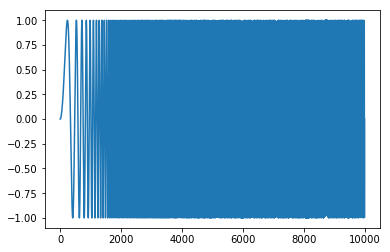

In [7]:
plot(y)

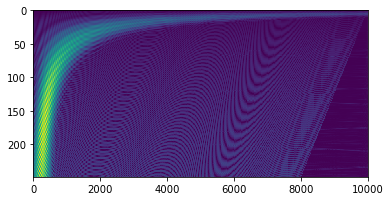

In [27]:
coef, freqs=cwt(y,arange(1,250),'cmor')
imshow(abs(coef),aspect=20)

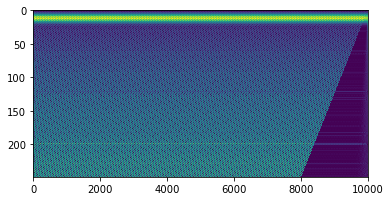

In [28]:
coef, freqs=cwt(x,arange(1,250),'cmor')
imshow(abs(coef),aspect=20)

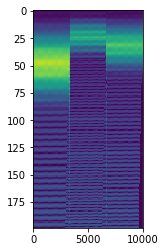

In [59]:
coef, freqs=cwt(z,arange(1,200)/4,'cmor')
imshow(abs(coef),aspect=100)

In [15]:
wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

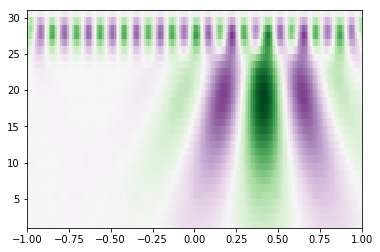

In [62]:
## From pwwavelets documentation
t = linspace(-1, 1, 200, endpoint=False)
sig  = cos(2 * pi * 7 * t) + real(exp(-7*(t-0.4)**2)*exp(1j*2*pi*2*(t-0.4)))
widths = arange(1, 31)
cwtmatr, freqs = cwt(sig, widths, 'mexh')
imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
       vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
show() 